## Imaging 

Testing different kind of imaging. The accuracy on the selection is not the goal here...

In [85]:
using PyCall
using Distributions , Statistics ,  Distances
using Random , Formatting

using PyPlot

rootdir = "/home/stephane/Science/GAIA"

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

In [86]:
## Get the data for a vot file with a standard set for dbscan
## 
function _getcluster(voname)
    data       = read_votable(voname)
    df         = filter_data(data)
    dfcart     = add_cartesian(df)
    blck       = [[1,2,3],[4,5], [6,7,8]]
    wghtblck   = [4.3,7.9,2.0]
    norm       = "identity"

    dfcartnorm , scale8 = normalization_PerBlock(dfcart, blck, wghtblck , norm, false) 
    
    println("## dbscan..")
    eps = 2.1 ; min_nei = 7 ; min_cl = 18
    labels = clusters(dfcartnorm.data , eps , 20, min_nei, min_cl)
    labelmax , nmax = find_cluster_label(labels)
    
    cluster = subsetDf(dfcart , labels[labelmax])
    return(cluster)
end

_getcluster (generic function with 1 method)

In [87]:
function _plot_density(Z , xrange , yrange , cmap)
    fig = figure(figsize=(11,4.0))

    ax1 = subplot(121)
    grid("on") 
    nxy = size(Z)
    nlab = 5 ## number of ticks
    im1 = ax1[:imshow](Z, interpolation="bilinear", cmap=cmap )
    xlabel("a1") ; ylabel("a2")
    ax1[:set_xticks](range(1, stop = nxy[1], length = nlab)) 
    ax1[:set_xticklabels](range(xrange[1], stop = xrange[2], length = nlab))
    ax1[:set_yticks](range(1, stop = nxy[2], length = nlab)) 
    ax1[:set_yticklabels](range(yrange[1], stop = yrange[2], length = nlab))   
    ax1[:set_aspect]("auto")
    fig[:colorbar](im1, ax=ax1)
    
    ax2 = subplot(122)
    grid("on") 
    im2 = ax2[:imshow](Z, interpolation="bilinear", cmap=cmap )
    xlabel("a1") ; ylabel("a2")
    ax2[:set_aspect]("auto")    
    fig[:colorbar](im2, ax=ax2)
    
    show()
end

_plot_density (generic function with 1 method)

In [88]:
## 2D density from 2 Vectors

function _density2D(X , Y , nx , ny, xrange=[0,1] , yrange=[0,1] ; Z = 0)
    dens = zeros(Float64,nx, ny)
    ndata = length(X)
    
    ## simple counting if Z not a X-like vector
    if length(Z) < ndata
        Z = ones(Float64 , ndata)
    end
    
    dx = (xrange[2] - xrange[1]) / nx ; dy = (yrange[2] - yrange[1]) / ny
    
    indx = floor.(Int64 , (X .- xrange[1]) ./ dx)
    indy = floor.(Int64 , (Y .- yrange[1]) ./ dy)
    
    icrop = (indx .>= 1) .& (indx .<= nx) .& (indy .>= 1)  .& (indy .<= ny)

    for i in 1:ndata
        if icrop[i]
            dens[indx[i], indy[i]] += Z[i]
        end
    end
    
    dens = dens ./ (dx*dy)
    
    return(dens)
end

_density2D (generic function with 3 methods)

In [89]:
## adaptative smoothing to compute the density in counts or averaging value
##

function adaptSmoothing(im , winmax= 10, countstop= 10)
    nxy = size(im)
    
    imas = zeros(Float64, nxy[1] , nxy[2])
    for i in 1:nxy[1]
        for j in 1:nxy[2]
            snreached = false
            wij = -1
            while !snr
                cij = im[i,j] 
                wij += 2
                
            end
        end
    end
    
end

adaptSmoothing (generic function with 3 methods)

## Main 

## Main starting...
## Votable test.vot read
## Filtering done ...
## Stars selected: 143644


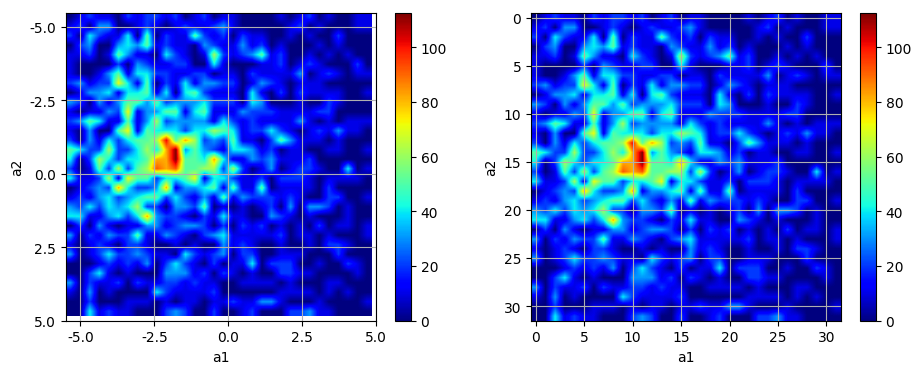

## Cartesian transformation done ...
## Normalization identity done...
### [1pc,1pc,1pc,1km/s,1km/s,1mag,1mag,1mag] equivalent to [0.310092, 0.310092, 0.310092, 0.569703, 0.569703, 0.144229, 0.144229, 0.144229]
##
## dbscan..


In [90]:
macro main(voname)
    println("## Main starting...")
    s = _getcluster(voname)
    
    ### density
    X = s.data[2,:]  
    Y = s.data[3,:]
    # X = 1:10
    # Y = 1:10
    dens = _density2D(X , Y , 64 , 64 , [-5 , 5.],[ -5 , 5])
    _plot_density(dens , [-5,5], [-5,5] ,"jet")
    
end

@main("test.vot")